In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np


/Users/Htrucci/miniconda3/envs/ml_default/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
# classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size=(2, 2)))
# classifier.add(Dropout(0.25))
# classifier.add(Conv2D(64, (3, 3), activation='relu'))
# classifier.add(Conv2D(64, (3, 3), activation='relu'))
# classifier.add(MaxPooling2D(pool_size=(2, 2)))
# classifier.add(Dropout(0.25))
# classifier.add(Flatten())
# classifier.add(Dense(500, activation='relu'))
# classifier.add(Dropout(0.5))
# classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Flatten())
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(3, activation='softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [4]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255)

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

# test_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')


training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

valid_set = test_datagen.flow_from_directory('data/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

#test_set = test_datagen.flow_from_directory('data/validation',
#                                           target_size = (64, 64),
#                                           batch_size = 12,
#                                           class_mode = 'categorical')

hist = classifier.fit_generator(training_set,
                         steps_per_epoch = 100,
                         epochs = 20,
                         validation_data = valid_set,
                         validation_steps = 200)


Found 503 images belonging to 3 classes.
Found 61 images belonging to 3 classes.
Epoch 1/20


/Users/Htrucci/miniconda3/envs/ml_default/lib/python3.6/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


100/100 [==============================] - 148s 1s/step - loss: 0.4751 - acc: 0.7848 - val_loss: 0.0826 - val_acc: 0.9677
Epoch 2/20
100/100 [==============================] - 145s 1s/step - loss: 0.0897 - acc: 0.9707 - val_loss: 0.0763 - val_acc: 0.9659
Epoch 3/20
100/100 [==============================] - 145s 1s/step - loss: 0.1104 - acc: 0.9703 - val_loss: 0.0798 - val_acc: 0.9808
Epoch 4/20
100/100 [==============================] - 144s 1s/step - loss: 0.0610 - acc: 0.9786 - val_loss: 0.0548 - val_acc: 0.9834
Epoch 5/20
100/100 [==============================] - 141s 1s/step - loss: 0.0600 - acc: 0.9787 - val_loss: 0.0733 - val_acc: 0.9810
Epoch 6/20
100/100 [==============================] - 139s 1s/step - loss: 0.0330 - acc: 0.9882 - val_loss: 0.0805 - val_acc: 0.9823
Epoch 7/20
100/100 [==============================] - 138s 1s/step - loss: 0.0860 - acc: 0.9717 - val_loss: 0.0720 - val_acc: 0.9821
Epoch 8/20
100/100 [==============================] - 181s 2s/step - loss: 0.075

In [5]:
# output = classifier.predict_generator(test_set, steps=5)
# print(test_set.class_indices)
# print(output)

# 모델 평가하기
print("-- Evaluate --")

scores = classifier.evaluate_generator(
            valid_set, 
            steps = 10)

print("%s: %.2f%%" %(classifier.metrics_names[1], scores[1]*100))

# 모델 예측하기
print("-- Predict --")

output = classifier.predict_generator(
            valid_set, 
            steps = 10)
print(valid_set.class_indices)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(output)
print(valid_set.filenames)


-- Evaluate --
acc: 91.48%
-- Predict --
{'lemon': 0, 'strawberry': 1, 'tangerine': 2}
[[0.999 0.000 0.001]
 [0.984 0.000 0.016]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.058 0.002 0.941]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.018 0.000 0.982]
 [0.373 0.004 0.623]
 [0.000 1.000 0.000]
 [0.090 0.003 0.907]
 [0.003 0.000 0.997]
 [0.000 1.000 0.000]
 [0.914 0.008 0.078]
 [0.000 1.000 0.000]
 [0.865 0.006 0.128]
 [0.000 1.000 0.000]
 [0.987 0.000 0.013]
 [0.993 0.000 0.007]
 [0.916 0.008 0.077]
 [0.774 0.006 0.220]
 [0.984 0.000 0.016]
 [0.012 0.000 0.988]
 [0.000 1.000 0.000]
 [0.963 0.002 0.035]
 [0.957 0.004 0.039]
 [0.027 0.007 0.966]
 [0.984 0.000 0.016]
 [0.963 0.001 0.036]
 [0.000 0.000 1.000]
 [0.983 0.000 0.017]
 [0.168 0.015 0.817]
 [0.992 0.001 0.007]
 [0.000 1.000 0.000]
 [0.982 0.000 0.017]
 [0.995 0.000 0.005]
 [0.988 0.000 0.012]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.115 0.010 0.875]
 [0.993 0.

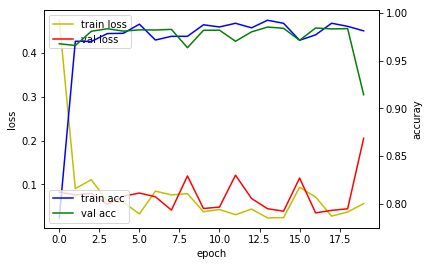

In [6]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
#loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
#acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [7]:
import coremltools
# Saving the Core ML model to a file.
#coreml_model = coremltools.converters.keras.convert(classifier)
#class_labels = ['cherry', 'hanlabong', 'lemon', 'raspberry', 'strawberry', 'tangerine']
class_labels = ['lemon', 'strawberry', 'tangerine']
coreml_model = coremltools.converters.keras.convert(classifier, input_names='image', image_input_names='image', class_labels=class_labels, is_bgr=True)  
coreml_model.save('my_model.mlmodel')

0 : conv2d_7_input, <keras.engine.topology.InputLayer object at 0x10d71cf60>
1 : conv2d_7, <keras.layers.convolutional.Conv2D object at 0x10d71cda0>
2 : conv2d_7__activation__, <keras.layers.core.Activation object at 0x1821089e48>
3 : conv2d_8, <keras.layers.convolutional.Conv2D object at 0x10d71ce10>
4 : conv2d_8__activation__, <keras.layers.core.Activation object at 0x10d907048>
5 : max_pooling2d_4, <keras.layers.pooling.MaxPooling2D object at 0x10d71f898>
6 : conv2d_9, <keras.layers.convolutional.Conv2D object at 0x10d733358>
7 : conv2d_9__activation__, <keras.layers.core.Activation object at 0x1062252e8>
8 : conv2d_10, <keras.layers.convolutional.Conv2D object at 0x10d70d1d0>
9 : conv2d_10__activation__, <keras.layers.core.Activation object at 0x10e75b550>
10 : max_pooling2d_5, <keras.layers.pooling.MaxPooling2D object at 0x10d7a37b8>
11 : conv2d_11, <keras.layers.convolutional.Conv2D object at 0x10d7ba128>
12 : conv2d_11__activation__, <keras.layers.core.Activation object at 0x10e

In [8]:
from keras.models import load_model

classifier.save('fruit_cnn_keras_model.h5')

In [9]:
from keras.models import load_model
from keras.preprocessing import image

classifier = load_model('fruit_cnn_keras_model.h5')
classifier.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# predicting multiple images at once
img = image.load_img('lemon/000001.jpg', target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)

# pass the list of multiple images np.vstack()
images = np.vstack([x, y])
#classes = classifier.predict_classes(images, batch_size=32.)
classes = classifier.predict_classes(images, batch_size=1, verbose=1)

# print the classes, the images belong to
print(classes)
#print(classes[0])
#print(classes[1])


2/2 [==============================] - 0s 112ms/step
[0 0]


In [10]:
img = image.load_img('lemon/000002.jpg', target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)

# pass the list of multiple images np.vstack()
images = np.vstack([x, y])
classes = classifier.predict_classes(images, batch_size=32, verbose=1)

# print the classes, the images belong to
print(classes)
#print(classes[0][0])
#print(classes[1])

2/2 [==============================] - 0s 20ms/step
[0 0]


In [47]:
img = image.load_img('lemon/000003.jpg', target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)

# pass the list of multiple images np.vstack()
images = np.vstack([x, y])
classes = classifier.predict_classes(images, batch_size=32, verbose=1)

# print the classes, the images belong to
print(classes)
#print(classes[0])
#print(classes[1])

2/2 [==============================] - 0s 13ms/step
[1 1]


In [11]:
img = image.load_img('lemon/000004.jpg', target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)

# pass the list of multiple images np.vstack()
images = np.vstack([x, y])
classes = classifier.predict_classes(images, batch_size=10)

# print the classes, the images belong to
print(classes)
#print(classes[0])
#print(classes[1])

[0 0]


In [12]:
img = image.load_img('lemon/000005.jpg', target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)

# pass the list of multiple images np.vstack()
images = np.vstack([x, y])
classes = classifier.predict_classes(images, batch_size=32, verbose=1)

# print the classes, the images belong to
print(classes)
#print(classes[0])
#print(classes[1])

2/2 [==============================] - 0s 15ms/step
[0 0]
